## Stouts vs. Porters: Machine Learning
This notebook is a small scale MVP looking at the differences between stouts and porters on an ingredient basis. The sample size is very small, so the results do not follow rigorous testing, but point to a belief that the differences may be explained by grist. Future work to include a larger sample of recipes to follow.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
from pandas_profiling import ProfileReport

In [2]:
# Small CSV file of top results from homebrewing websites for simple stout and porter recipes

recipes=pd.read_csv(r'C:\Users\ejfel\OneDrive\Desktop\Metis\Projects\stout_vs_porter.csv')
recipes=recipes.fillna(0)

In [11]:
# Holdout test recipe features:

d = {'crystal_50': [0, .042], 'flaked': [0, 0], 'roasted_barley': [0, .042]}
X_test = pd.DataFrame(data=d)
X_test

,crystal_50,flaked,roasted_barley
0,0.000,0,0.000
1,0.042,0,0.042


In [3]:
# Small df of the stouts and porters
recipes=recipes[:16]
recipes

,recipe,style,IBU,SRM,OG,FG,Mash,flaked,light_adjunct,dark_adjunct,...,black,brown,chocolate,crystal_150,roasted_barley,special,candi_180,carafa2,aromatic,total
0,byo_porter,0.0,35.0,50.0,58.0,14.0,153.0,0.000,3.000000,0.25000,...,0.25000,0.0,0.00,0.0,0.00000,0.0,0.0,0.0,0.0,9.250000
1,gf_porter,0.0,35.0,0.0,63.0,16.0,153.0,0.000,1.000000,3.50000,...,0.00000,3.0,0.50,0.0,0.00000,0.0,0.0,0.0,0.0,13.500000
2,bab_porter,0.0,40.0,0.0,0.0,0.0,153.0,0.000,3.000000,1.50000,...,0.50000,0.0,1.00,0.0,0.00000,0.0,0.0,0.0,0.0,14.500000
3,bs_porter,0.0,32.6,27.8,45.0,15.0,0.0,0.000,1.000000,0.75000,...,0.25000,0.0,0.50,0.0,0.00000,0.0,0.0,0.0,0.0,8.750000
4,la_porter,0.0,269.0,35.7,65.0,0.0,152.0,0.000,0.500000,1.76000,...,0.00000,0.0,0.63,1.0,0.13000,0.0,0.0,0.0,0.0,12.260000
5,pliers_porter,0.0,30.0,0.0,53.0,12.0,152.0,0.000,1.000000,2.00000,...,0.00000,1.0,1.00,0.0,0.00000,0.0,0.0,0.0,0.0,11.000000
6,aha_porter,0.0,37.0,35.6,69.0,12.0,156.0,0.000,1.500000,2.50000,...,0.00000,0.0,2.50,0.0,0.00000,0.0,0.0,0.0,0.0,30.000000
7,jamil_porter,0.0,34.1,35.7,65.0,0.0,152.0,0.000,3.000000,1.25000,...,0.50000,0.0,0.75,0.0,0.00000,0.0,0.0,0.0,0.0,15.750000
8,aab_stout,1.0,35.0,0.0,60.0,0.0,0.0,2.000,0.500000,0.50000,...,0.00000,0.0,0.50,0.0,0.00000,0.0,0.0,0.0,0.0,10.000000
9,byo_stout,1.0,73.0,48.0,72.0,17.0,154.0,0.000,0.683125,1.58375,...,0.90375,0.0,0.68,0.0,0.00000,0.0,0.0,0.0,0.0,15.736875


In [4]:
# Normalizing ingredients as parts of the whole
recipes.Base=(recipes.Base/recipes.total)
recipes.flaked=(recipes.flaked/recipes.total)
recipes.light_adjunct=(recipes.light_adjunct/recipes.total)
recipes.dark_adjunct=(recipes.dark_adjunct/recipes.total)
recipes.munich_8=(recipes.munich_8/recipes.total)
recipes.crystal_50=(recipes.crystal_50/recipes.total)
recipes.crystal_80=(recipes.crystal_80/recipes.total)
recipes.crystal_150=(recipes.crystal_150/recipes.total)
recipes.black=(recipes.black/recipes.total)
recipes.brown=(recipes.brown/recipes.total)
recipes.chocolate=(recipes.chocolate/recipes.total)
recipes.roasted_barley=(recipes.roasted_barley/recipes.total)
recipes.special=(recipes.special/recipes.total)
recipes.candi_180=(recipes.candi_180/recipes.total)
recipes.carafa2=(recipes.carafa2/recipes.total)
recipes.aromatic=(recipes.aromatic/recipes.total)
recipes.head()

,recipe,style,IBU,SRM,OG,FG,Mash,flaked,light_adjunct,dark_adjunct,...,black,brown,chocolate,crystal_150,roasted_barley,special,candi_180,carafa2,aromatic,total
0,byo_porter,0.0,35.0,50.0,58.0,14.0,153.0,0.0,0.324324,0.027027,...,0.027027,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,9.25
1,gf_porter,0.0,35.0,0.0,63.0,16.0,153.0,0.0,0.074074,0.259259,...,0.000000,0.222222,0.037037,0.000000,0.000000,0.0,0.0,0.0,0.0,13.50
2,bab_porter,0.0,40.0,0.0,0.0,0.0,153.0,0.0,0.206897,0.103448,...,0.034483,0.000000,0.068966,0.000000,0.000000,0.0,0.0,0.0,0.0,14.50
3,bs_porter,0.0,32.6,27.8,45.0,15.0,0.0,0.0,0.114286,0.085714,...,0.028571,0.000000,0.057143,0.000000,0.000000,0.0,0.0,0.0,0.0,8.75
4,la_porter,0.0,269.0,35.7,65.0,0.0,152.0,0.0,0.040783,0.143556,...,0.000000,0.000000,0.051387,0.081566,0.010604,0.0,0.0,0.0,0.0,12.26


In [ ]:
# profile = ProfileReport(recipes, title="Pandas Profiling Report on Stout/Porter Recipes")

In [ ]:
# profile.to_widgets()

## Notes from the widget EDA above
It appears as though important features include the amounts of medium crystal, flaked grain, and roasted barley. 

In [5]:
features=recipes[['crystal_50','flaked','roasted_barley']]
target=recipes[['style']]
# style is binarized encoding for stout (1) vs porter (0)

In [6]:
features.head()

,crystal_50,flaked,roasted_barley
0,0.000000,0.0,0.000000
1,0.074074,0.0,0.000000
2,0.068966,0.0,0.000000
3,0.085714,0.0,0.000000
4,0.000000,0.0,0.010604


In [14]:
# First model choice for classifying is a Logistic regression between the binary choices (stout, porter)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
X=features
y=target
clf = LogisticRegression(random_state=0).fit(X, y)

C:\Users\ejfel\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [9]:
clf.predict(X)

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.])

In [12]:
clf.predict(X_test)

array([0., 0.])

In [13]:
clf.score(X,y)

0.875

In [22]:
# Precision, Recall, F1 scores for the above model
scores = pd.DataFrame(precision_recall_fscore_support(y,clf.predict(X)),columns=['porter','stout'])
scores

,porter,stout
0,0.800000,1.000000
1,1.000000,0.750000
2,0.888889,0.857143
3,8.000000,8.000000


In [28]:
# Second model is a decision tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [36]:
beer_tree = DecisionTreeClassifier(random_state=0,max_depth=4)
beer_tree.fit(X,y)
beer_tree.predict(X)

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [37]:
beer_tree.predict(X_test)

array([0., 1.])

In [38]:
# Precision, Recall, F1 scores for the above model
scores = pd.DataFrame(precision_recall_fscore_support(y,beer_tree.predict(X)),columns=['porter','stout'])
scores

,porter,stout
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,8.0,8.0


## Conclusions
Obviously, this is a very small data set and it stands to reason that these models are likely overfit to the small samples, especially without cross validation. However, this MVP seems to imply that the features of medium kilned crystal, flaked adjuncts, and roasted barley give some indication as to some of the possible differences between stouts and porters.

[Text(239.14285714285714, 195.696, 'X[1] <= 0.016\ngini = 0.5\nsamples = 16\nvalue = [8, 8]'),
 Text(191.31428571428572, 152.208, 'X[2] <= 0.033\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(143.4857142857143, 108.72, 'X[0] <= 0.047\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(95.65714285714286, 65.232, 'X[0] <= 0.022\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(47.82857142857143, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(143.4857142857143, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(191.31428571428572, 65.232, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(239.14285714285714, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(286.9714285714286, 152.208, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

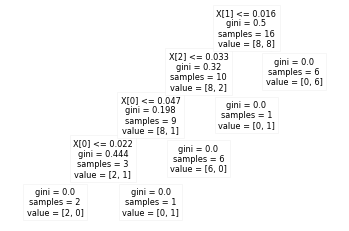

In [39]:
tree.plot_tree(beer_tree)

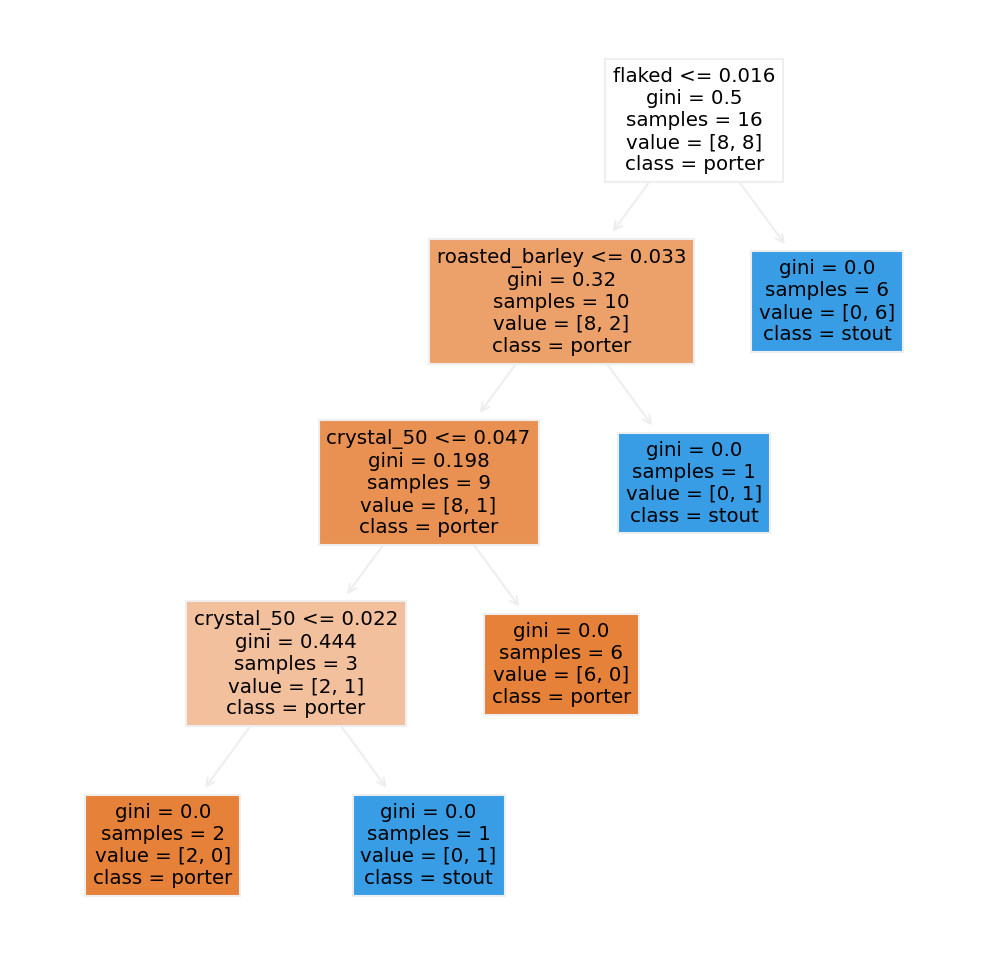

In [40]:
fn=['crystal_50','flaked','roasted_barley']
cn=['porter', 'stout']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(beer_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
# fig.savefig('imagename.pn